# Combined Data Visualization Notebook

This notebook focuses on analyzing the combined data set and exploring the data to analyze its comparable elements. In this notebook, we will:
- Load the combined dataset from `data/combined/`.
- Display basic information about the dataset.
- Summarize statistics for numerical fields.
- Vissualize key distributions and relationships

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Date handling
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
%matplotlib inline

# Display settings for notebooks
pd.set_option('display.max_columns', None)

Load the Combined Dataset

In [4]:
# Define the path to your combined data file
combined_path = "data/combined/combined_apps.csv"

# Load the dataset
df = pd.read_csv(combined_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (13071, 24)


,package_name,category,license,source_code,author,suggested_version,anti_features,added_date,last_updated_date,app_name,summary,description,platform,app_age_days,rating,reviews,size_mb,installs_clean,type,price_clean,content_rating,genres,current_ver,android_ver
0,info.puzz.a10000sentences,Science & Education,Apache-2.0,https://github.com/tkrajina/10000sentences,SCIO,0.3.4,NonFreeNet,2019-09-18T17:00:00,2019-09-18 17:00:00,"10,000 sentences",Learn new words in foreign languages,NaN,FDroid,2029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,com.github.ashutoshgngwr.tenbitclockwidget,"Theming, Time",GPL-3.0-only,https://github.com/ashutoshgngwr/10-bitClockWi...,NaN,2.2-1,NaN,2020-10-01T17:00:00,2023-10-08 11:25:01,10-bit Clock Widget,A beautiful BCD clock for your home screen,10-bit Clock Widget presents current time on y...,FDroid,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dev.lonami.klooni,Games,GPL-3.0-or-later,https://github.com/LonamiWebs/Klooni1010,NaN,0.8.6,NaN,2020-05-08T17:00:00,2020-08-31 17:00:00,1010! Klooni,A libGDX game based on 1010,Introducing Klooni\n------------------\n\n1010...,FDroid,1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eu.quelltext.counting,"Games, Science & Education",AGPL-3.0-or-later,https://gitlab.com/niccokunzmann/12345,Nicco Kunzmann,1.3,NaN,2022-03-01T16:00:00,2022-03-03 16:00:00,12345 - Learn Counting,Learn counting in different languages with pic...,Count objects on images and choose their numbe...,FDroid,1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.lucasdnd.bitclock16,Time,GPL-2.0-or-later,https://github.com/lucasdnd/16-bit-clock,NaN,1.0,NaN,2015-03-29T17:00:00,2015-03-29 17:00:00,16-bit Clock Widget,Binary clock,NaN,FDroid,3663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Quick Data Exploration & Summary Statistics

In [7]:
# Summary statistics for numeric fields
print(df.describe())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Overview of categorical variables
print("Unique categories in 'category':", df["category"].unique())
print("Unique platforms:", df["platform"].unique())

       app_age_days       rating       reviews      size_mb  installs_clean  \
count  13071.000000  9366.000000  9.366000e+03  7729.000000    9.366000e+03   
mean    2254.331421     4.191757  5.140498e+05    22.957271    1.789744e+07   
std     1042.733430     0.515219  3.144042e+06    23.445811    9.123822e+07   
min        3.000000     1.000000  1.000000e+00     0.008301    1.000000e+00   
25%     2439.000000     4.000000  1.862500e+02     5.300000    1.000000e+04   
50%     2468.000000     4.300000  5.930500e+03    14.000000    5.000000e+05   
75%     2693.000000     4.500000  8.153275e+04    33.000000    5.000000e+06   
max     5436.000000     5.000000  7.815831e+07   100.000000    1.000000e+09   

       price_clean  
count  9366.000000  
mean      0.960928  
std      15.816585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     400.000000  
Missing values per column:
package_name          9366
category                 0
license           

Visualize Key Distributions & Relationships

1. Distribution of Ratings

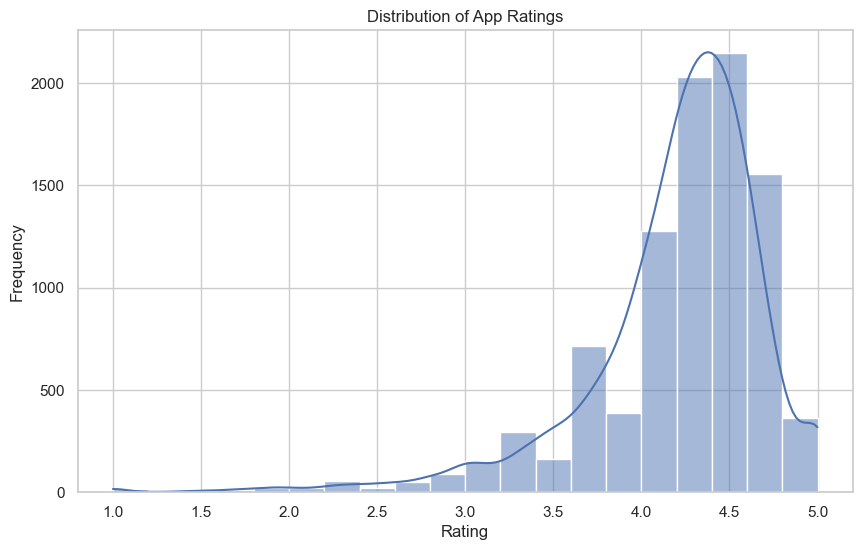

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Distribution of Installs

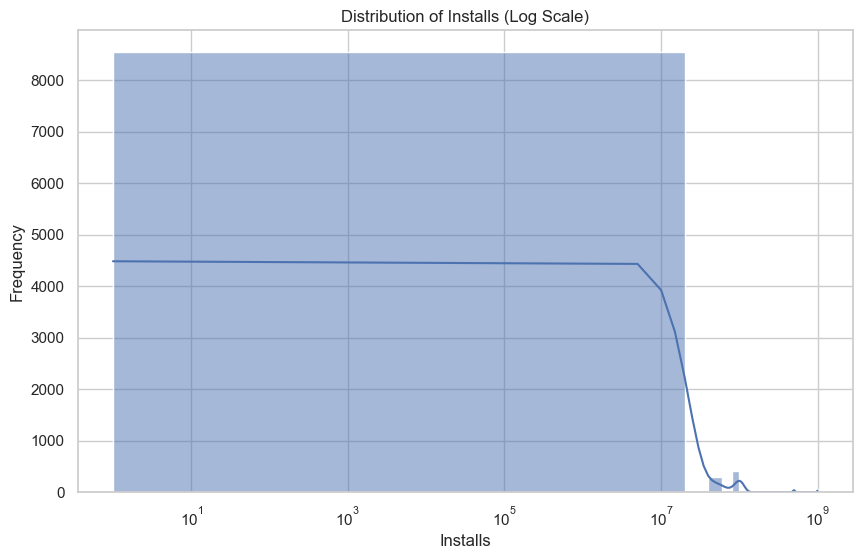

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df["installs_clean"], bins=50, kde=True)
plt.xscale("log")
plt.title("Distribution of Installs (Log Scale)")
plt.xlabel("Installs")
plt.ylabel("Frequency")
plt.show()

Relationship Between Reviews and Rating

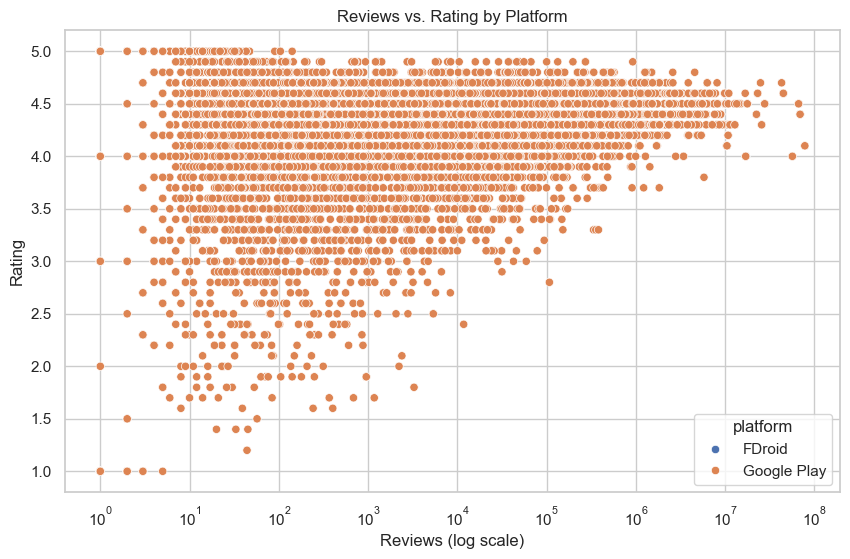

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="reviews", y="rating", hue="platform", data=df)
plt.xscale("log")
plt.title("Reviews vs. Rating by Platform")
plt.xlabel("Reviews (log scale)")
plt.ylabel("Rating")
plt.show()

Correlation Heatmap

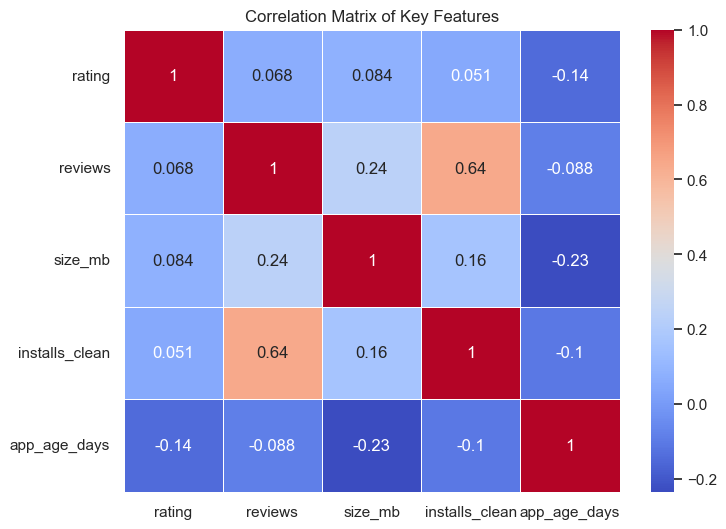

In [22]:
# Select numeric columns for correlation analysis
numeric_cols = ["rating", "reviews", "size_mb", "installs_clean", "app_age_days"]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Key Features")
plt.show()